![](relu.jpg)

# 1. Introduction

The key advantages of ReLU include:

- **Non-linearity**: ReLU introduces non-linearity into the model, allowing it to ***learn complex relationships and patterns*** in the data. Without non-linear activation functions, a neural network would behave like a linear model, and stacking multiple layers would not provide any additional expressive power.

- **Computational Efficiency**: ReLU is computationally efficient compared to some other activation functions like sigmoid or hyperbolic tangent (tanh). The computation of the ReLU function involves a simple thresholding operation, making it ***faster to compute during both training and inference***.

- **Sparse Activation**: ReLU tends to produce sparse activations (i.e., many neurons output zero), which can lead to more efficient and less redundant representations in the network. This sparsity can be beneficial for both ***memory usage and computation***.

# 2. Formula

The ReLU activation function is defined as follows:

$$f(x)=max⁡(0,x)$$

## 2.1 `numpy.maximum`

In [2]:
import numpy as np

def sgl_relu_np(m,b,x):
    y = m*x+b
    relu_y = np.maximum(y,0)
    return relu_y 

sgl_relu_np(1,1,1)

2

## 2.2 `torch.clip` - version 1



Note: `torch.clip` won't work because it accepts tensors only, and the below function is inputting python native types

In [3]:
import torch

def sgl_relu_pytclip_v1(m,b,x):
    y = m*x+b # input to torch needs to be a tensor, ie y=mx+b doesnt work as seen in error:
    print(type(y))
    return torch.clip(y,0.)
    

sgl_relu_pytclip_v1(1,1,1)

<class 'int'>


TypeError: clip() received an invalid combination of arguments - got (int, float), but expected one of:
 * (Tensor input, Tensor min, Tensor max, *, Tensor out)
 * (Tensor input, Number min, Number max, *, Tensor out)


## 2.3 `torch.clip` - version 2

In [ ]:
def sgl_relu_pytclip_v2(m,b,x):
    xs_tsr = torch.tensor(x)
    y = m*xs_tsr+b # convert inputs to tensor first
    print(type(y))
    return torch.clip(y,0.)
    
sgl_relu_pytclip_v2(1,1,1)

<class 'torch.Tensor'>


tensor(2.)

## 2.4 `torch.nn.functional.relu`

`nn.relu` also only takes Tensor input. I'll use this function going forward.

In [ ]:
import torch.nn.functional as nn

def sgl_relu_nn(m,b,x):
    xs_tsr = torch.tensor(x)
    ys_tsr = m*xs_tsr+b # convert inputs to tensor first
    relu_y = nn.relu(ys_tsr)
    print(type(relu_y))
    return relu_y

sgl_relu_nn(1,1,1)

<class 'torch.Tensor'>


tensor(2)

# 3. Single ReLU plotter

**Goal**  

- Create a function `relu_plotter_fn`  
  
**inputs** :

- `m`   
- `b`  

**outputs**:

- relu plot   
- within a `x` range  
- within a `y` range  

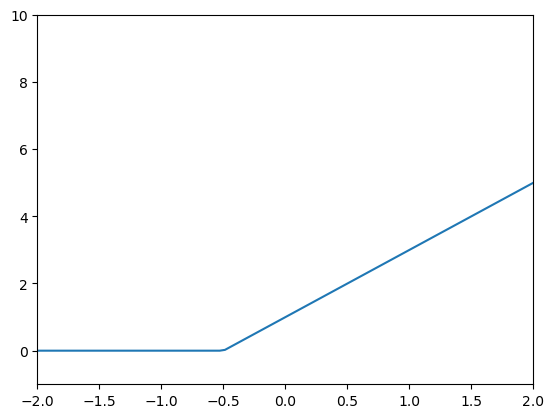

In [ ]:
import torch
import torch.nn.functional as nn
from functools import partial
import matplotlib.pyplot as plt

def relu_sgl_fn(m,b,x):
    y = m*x+b
    return nn.relu(y)

def relu_sgl_plotter_fn(m,b):
    xs_sgl_100_tsr = torch.linspace(-2.1,2.1,steps=100)
    def relu_sgl_mb_fn(m,b): return partial(relu_sgl_fn,m,b)

    relu_sgl_mb_model = relu_sgl_mb_fn(m,b)
    ys_sgl_mb_100_tsr = relu_sgl_mb_model(xs_sgl_100_tsr)

    plt.xlim((-2,2))
    plt.ylim((-1,10))
    plt.plot(xs_sgl_100_tsr, ys_sgl_mb_100_tsr)

m=2
b=1
relu_sgl_plotter_fn(m,b)

# 3. Double ReLU plotter

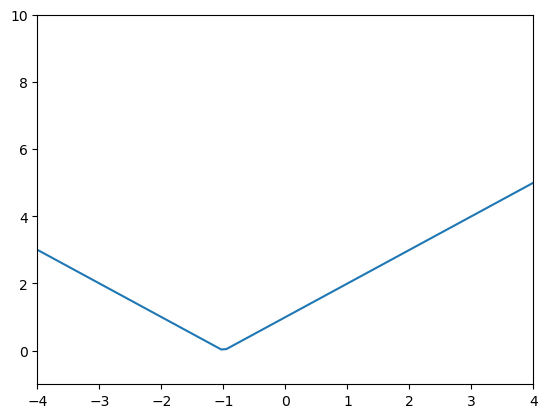

In [46]:
import torch
import torch.nn.functional as nn
from functools import partial
import matplotlib.pyplot as plt
from ipywidgets import interact

def relu_dbl_fn(m1,b1,m2,b2,x):
    y1 = m1*x+b1
    y2 = m2*x+b2
    return nn.relu(y1) + nn.relu(y2)

def relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2): return partial(relu_dbl_fn,m1,b1,m2,b2)

# @interact(m1=1,b1=1,m2=-1,b2=-1)
def relu_dbl_interactive_plotter_fn(m1,b1,m2,b2):
    xs_sgl_100_tsr = torch.linspace(-4.1,4.1,steps=100)
    
    relu_dbl_m1b1m2b2_model = relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2)
    ys_dbl_m1b1m2b2_100_tsr = relu_dbl_m1b1m2b2_model(xs_sgl_100_tsr)

    plt.xlim((-4,4))
    plt.ylim((-1,10))
    plt.plot(xs_sgl_100_tsr, ys_dbl_m1b1m2b2_100_tsr)

relu_dbl_interactive_plotter_fn(1,1,-1,-1)

# 4. Gradient Descent on Double ReLU


## 4.1 Create noisey data we wish to model

In [ ]:
import torch
import torch.nn.functional as nn
from functools import partial
import matplotlib.pyplot as plt
from ipywidgets import interact

def quad_fn(a,b,c,x): return a*x**2 + b*x + c
def quad_abc_fn(a,b,c): return partial(quad_fn,a,b,c)

og_a= 3
og_b= 2
og_c= 1

xs_100_tsr = torch.linspace(-2.1,2.1,steps=100)
quad_og_model = quad_abc_fn(og_a,og_b,og_c)

np.random.seed(42)

def noise(tsr, scale): return np.random.normal(scale=scale,size=tsr.shape)
def add_scale_noise_to_tsr(tsr,scale,additive):
    tsr = tsr+tsr*noise(tsr, scale)
    tsr = tsr+noise(tsr, additive)
    return tsr

xs_20_tsr = torch.linspace(-2,2,steps=20)
ys_20_og_tsr = quad_og_model(xs_20_tsr)
ys_20_noisey_tsr = add_scale_noise_to_tsr(ys_20_og_tsr,0.15,1.5)


## 4.2 Recreate Double ReLU functions learnt earlier

In [ ]:
def relu_dbl_fn(m1,b1,m2,b2,x):
    y1 = m1*x+b1
    y2 = m2*x+b2
    return nn.relu(y1) + nn.relu(y2)


def relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2): return partial(relu_dbl_fn,m1,b1,m2,b2)


## 4.3 Create MAE calculate and Loss Function

In [47]:
def calc_mae(actual, preds): return torch.abs(actual-preds).mean()

def relu_2_loss_function(params):
    def relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2): return partial(relu_dbl_fn,m1,b1,m2,b2)
    relu_dbl_m1b1m2b2_model = relu_dbl_m1b1m2b2_fn(*params)
    ys_preds_20_tsr = relu_dbl_m1b1m2b2_model(xs_20_tsr)
    return calc_mae(ys_20_noisey_tsr,ys_preds_20_tsr)

## 4.4 Loss is `4.1318` with original input tensor([`0.5,0.5,-0.5,-0.5`])

In [20]:
m1b1_m2b2_tsr = torch.tensor([0.5,0.5,-0.5,-0.5],requires_grad=True)
relu_2_loss_function(m1b1_m2b2_tsr)


tensor(4.1318, dtype=torch.float64, grad_fn=<MeanBackward0>)

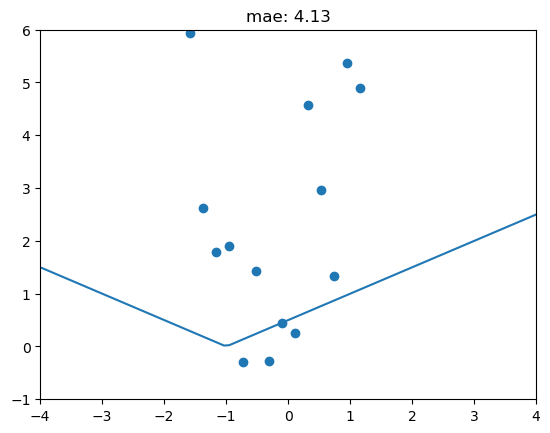

In [52]:
# @interact(m1=0.5,b1=0.5,m2=-.5,b2=-.5)
def relu_dbl_interactive_plotter_fn(m1,b1,m2,b2):
    xs_sgl_100_tsr = torch.linspace(-4.1,4.1,steps=100)
    
    relu_dbl_m1b1m2b2_model = relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2)
    ys_dbl_m1b1m2b2_100_tsr = relu_dbl_m1b1m2b2_model(xs_sgl_100_tsr)

    plt.xlim((-4,4))
    plt.ylim((-1,6))
    plt.plot(xs_sgl_100_tsr, ys_dbl_m1b1m2b2_100_tsr)
    plt.scatter(xs_20_tsr,ys_20_noisey_tsr)

    # print(ys_20_noisey_tsr)
    ys_dbl_preds_20_tsr = relu_dbl_m1b1m2b2_model(xs_20_tsr)
    mae = calc_mae(ys_20_noisey_tsr, ys_dbl_preds_20_tsr)
    plt.title(label=f"mae: {mae:.2f}")
relu_dbl_interactive_plotter_fn(0.5,0.5,-0.5,-0.5)


## 4.5 `1.96` Loss with Gradient Descent after 40 epochs 

In [53]:
m1b1_m2b2_tsr = torch.tensor([0.5,0.5,-0.5,-0.5],requires_grad=True)

for i in range(40):
    loss = relu_2_loss_function(m1b1_m2b2_tsr)
    loss.backward()

    with torch.no_grad():
        m1b1_m2b2_tsr -= m1b1_m2b2_tsr.grad*0.01
        print(f"loss_{i+1}: {loss:.2f} - [{m1b1_m2b2_tsr}]")


loss_1: 4.13 - [tensor([ 0.5049,  0.5045, -0.5039, -0.4975], requires_grad=True)]
loss_2: 4.13 - [tensor([ 0.5147,  0.5135, -0.5118, -0.4925], requires_grad=True)]
loss_3: 4.11 - [tensor([ 0.5295,  0.5260, -0.5237, -0.4850], requires_grad=True)]
loss_4: 4.09 - [tensor([ 0.5493,  0.5420, -0.5399, -0.4745], requires_grad=True)]
loss_5: 4.07 - [tensor([ 0.5741,  0.5615, -0.5606, -0.4610], requires_grad=True)]
loss_6: 4.04 - [tensor([ 0.6038,  0.5845, -0.5857, -0.4445], requires_grad=True)]
loss_7: 4.00 - [tensor([ 0.6386,  0.6110, -0.6153, -0.4250], requires_grad=True)]
loss_8: 3.95 - [tensor([ 0.6784,  0.6410, -0.6488, -0.4030], requires_grad=True)]
loss_9: 3.90 - [tensor([ 0.7237,  0.6740, -0.6865, -0.3785], requires_grad=True)]
loss_10: 3.85 - [tensor([ 0.7744,  0.7100, -0.7282, -0.3515], requires_grad=True)]
loss_11: 3.78 - [tensor([ 0.8306,  0.7490, -0.7742, -0.3215], requires_grad=True)]
loss_12: 3.71 - [tensor([ 0.8916,  0.7900, -0.8245, -0.2885], requires_grad=True)]
loss_13: 3.65

## 4.6 MAE in chart is `2.03` instead of `1.96`, but its close enough.

Gotta figure out why it isnt matching exactly.


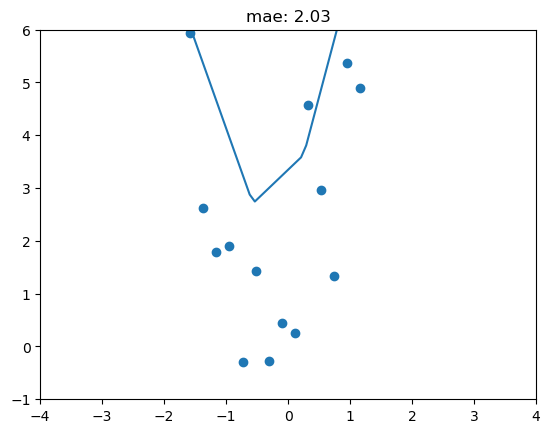

In [56]:
def relu_dbl_interactive_plotter_fn(m1,b1,m2,b2):
    xs_sgl_100_tsr = torch.linspace(-4.1,4.1,steps=100)
    
    relu_dbl_m1b1m2b2_model = relu_dbl_m1b1m2b2_fn(m1,b1,m2,b2)
    ys_dbl_m1b1m2b2_100_tsr = relu_dbl_m1b1m2b2_model(xs_sgl_100_tsr)

    plt.xlim((-4,4))
    plt.ylim((-1,6))
    plt.plot(xs_sgl_100_tsr, ys_dbl_m1b1m2b2_100_tsr)
    plt.scatter(xs_20_tsr,ys_20_noisey_tsr)

    # print(ys_20_noisey_tsr)
    ys_dbl_preds_20_tsr = relu_dbl_m1b1m2b2_model(xs_20_tsr)
    mae = calc_mae(ys_20_noisey_tsr, ys_dbl_preds_20_tsr)
    plt.title(label=f"mae: {mae:.2f}")
relu_dbl_interactive_plotter_fn(m1=4.4251,  b1=2.5245, m2=-3.3031,  b2=0.8250)

# 5. Completed

I managed to apply `gradient descent` to a `double relu` and reduce errror by 50%, not bad!